### Background
- Metric multidimensional scaling is used in antigenic cartogprahy to plot high dimensional influenza virus binding assay data onto a low dimensional antigenic space
- The MDS algorithm uses an error minimisation procedure to embed the data. The sum of the squares of the errors is known as 'map stress'. 
- There is a python implementation of metric MDS (thanks to David Pattinson for writing this)

#### Question : how does map stress change as the data become increasingly noisey?
- Draw ground truth points from a known distribution and measure map stress
- Add noise at varying levels to the ground truth points
- Measure map stress at different noise levels

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import time
from pymds import DistanceMatrix

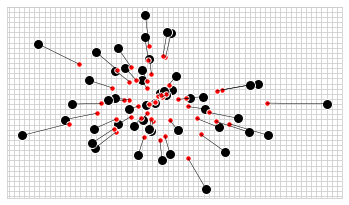

In [2]:
from numpy.random import uniform, normal, seed
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
sns.set_style('whitegrid')

# 50 random 2D samples
seed(1234)
samples = normal(loc=0, scale=10 ,size=(50,2))
samples2 = normal(loc=0, scale=20 ,size=(50,2))
samples3 = normal(loc=0, scale=40 ,size=(50,2))
samples4 = normal(loc=0, scale=100 ,size=(50,2))

# Measure pairwise distances between samples
dists = squareform(pdist(samples))
dists2 = squareform(pdist(samples2))
dists3 = squareform(pdist(samples3))
dists4 = squareform(pdist(samples4))

# condensing the points as a visual example of how manipulation of points is represented by MDS
dists_shrunk = dists * 0.65

# Embed
original = DistanceMatrix(dists).optimize()
shrunk = DistanceMatrix(dists_shrunk).optimize()

shrunk.orient_to(original, inplace=True)

original.plot(c='black', edgecolor='white', s=100)
shrunk.plot(c='red', edgecolor='white', s=30)
original.plot_lines_to(shrunk, linewidths=0.5, colors='black');

In [5]:
orig_stress = original.stress    # ground truth map has little stress, as should be the case because the points were taken 
                         # from a sample that embeds perfectly in 2 dimensions
orig_stress                      

3.536760631883081e-10

In [6]:
# checking to see if dists is a symmetrix square matrix
dists == dists.T

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [7]:
# check the shape of the distance matrix
dists.shape

(50, 50)

### Generate noise from a normal distribution with standard deviation 0.01 and plot, find map stress:

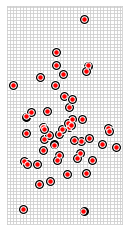

In [8]:
# make noise
n001 = normal(loc=0, scale=0.01 ,size=(50,2))

# Measure pairwise distances between samples
n001dists = squareform(pdist(n001))

# now to add noise
n001dists_orig= dists + n001dists

# embed and plot n1 dists
original = DistanceMatrix(dists).optimize()
n001_dist_proj = DistanceMatrix(n001dists_orig).optimize()

n001_dist_proj.orient_to(original, inplace=True)

original.plot(c='black', edgecolor='white', s=100)
n001_dist_proj.plot(c='red', edgecolor='white', s=30)
original.plot_lines_to(n001_dist_proj, linewidths=0.5, colors='black');

Calculate map stress:

In [9]:
n001_stress = n001_dist_proj.stress
n001_stress

0.14488229476232542

### Generate map and find stress when noise added has standard deviation of 1

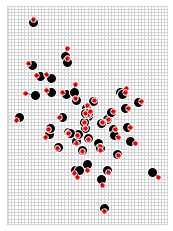

In [10]:
# make noise
n1 = normal(loc=0, scale=1 ,size=(50,2))

# Measure pairwise distances between samples
n1dists = squareform(pdist(n1))

# now to add noise
n1dists_orig= dists + n1dists

# embed and plot n1 dists
original = DistanceMatrix(dists).optimize()
n1_dist_proj = DistanceMatrix(n1dists_orig).optimize()

n1_dist_proj.orient_to(original, inplace=True)

original.plot(c='black', edgecolor='white', s=100)
n1_dist_proj.plot(c='red', edgecolor='white', s=30)
original.plot_lines_to(n1_dist_proj, linewidths=0.5, colors='black');

In [11]:
n1_stress = n1_dist_proj.stress
n1_stress

1083.4309453272695

### Generate map and find stress when noise added has standard deviation of 10

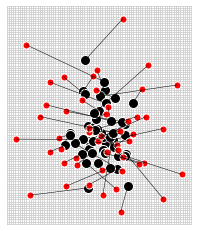

In [12]:
# make noise
n10 = normal(loc=0, scale=10 ,size=(50,2))

# Measure pairwise distances between samples
n10dists = squareform(pdist(n10))

# now to add noise
n10dists_orig= dists + n10dists

# embed and plot n1 dists
original = DistanceMatrix(dists).optimize()
n10_dist_proj = DistanceMatrix(n10dists_orig).optimize()

n10_dist_proj.orient_to(original, inplace=True)

original.plot(c='black', edgecolor='white', s=100)
n10_dist_proj.plot(c='red', edgecolor='white', s=50)
original.plot_lines_to(n10_dist_proj, linewidths=0.5, colors='black');

In [13]:
n10_stress = n10_dist_proj.stress
n10_stress

78574.58176083313

### How does map stress vary over a range of added noise levels?
- generate maps and calculate stress with added noise drawn from normal distributions with varying standard deviations (ie increasingly 'noisey' data')
- plot map stress against the standard deviation of the added noise

In [14]:
# make an empty list for map stresses
stresses = []

# standard deviation of the noise will range from 0 to 20, with 0.1 increments
for i in np.arange(0,20,0.1):
    
    nt = normal(loc=0, scale=i ,size=(50,2))
    
    ntdists = squareform(pdist(nt))

    # now to add noise
    ntdists_orig= dists + ntdists
    
    # embed
    emb = DistanceMatrix(ntdists_orig).optimize()
    
    # get map stress
    stresses.append(emb.stress)

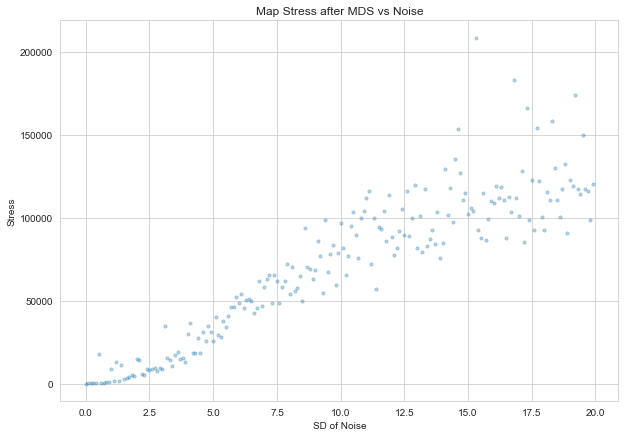

In [15]:
# plot stress vs noise 
plt.figure(figsize=(10,7))
plt.scatter(np.arange(0,20,0.1),stresses,s=10,alpha=0.3)
plt.title('Map Stress after MDS vs Noise')  
plt.xlabel('SD of Noise')  
plt.ylabel('Stress')  
plt.show();

In [16]:
# time how long this takes to run
time_start = time.time()

# add more points by taking more increments
stresses = []

# standard deviation of the noise will range from 0 to 20, with 0.1 increments
for i in np.arange(0,20,0.01):
    
    nt = normal(loc=0, scale=i ,size=(50,2))
    
    ntdists = squareform(pdist(nt))

    # now to add noise
    ntdists_orig= dists + ntdists
    
    # embed
    emb = DistanceMatrix(ntdists_orig).optimize()
    
    # get map stress
    stresses.append(emb.stress)

print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 98.49771213531494 seconds


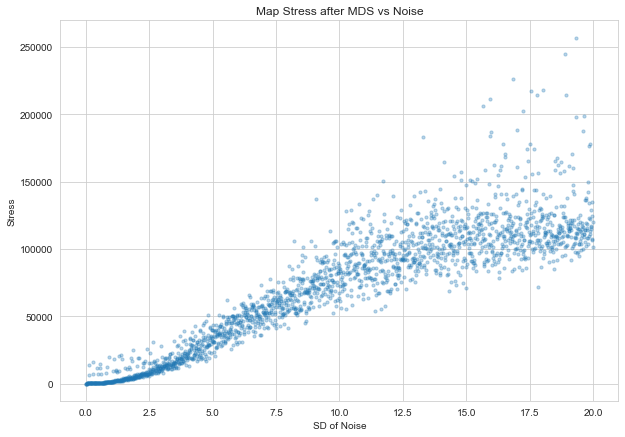

In [17]:
# plot stress vs noise 
plt.figure(figsize=(10,7))
plt.scatter(np.arange(0,20,0.01),stresses,s=10,alpha=0.3)
plt.title('Map Stress after MDS vs Noise')  
plt.xlabel('SD of Noise')  
plt.ylabel('Stress')  
plt.show();

In [18]:
time_start = time.time()

stresses2 = []

for i in np.arange(0,100,0.05):
    
    nt2 = normal(loc=0, scale=i ,size=(50,2))
    
    nt2dists = squareform(pdist(nt2))

    # now to add noise
    nt2dists_orig= dists + nt2dists
    
    # embed
    emb = DistanceMatrix(nt2dists_orig).optimize()
    
    # get map stress
    stresses2.append(emb.stress)
    
print('MDS done! Time elapsed: {} seconds'.format(time.time()-time_start))

MDS done! Time elapsed: 79.57923197746277 seconds


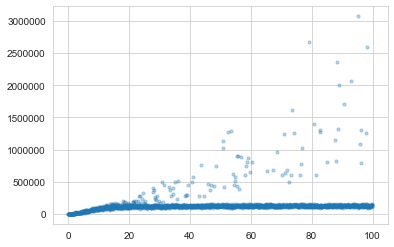

In [19]:
# plot stress vs noise 

plt.scatter(np.arange(0,100,0.05),stresses2,s=10,alpha=0.3);

Interesting, map stress seems to level off after noise SD reaches SD of original data